In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teis_df = pd.read_excel('../data/teis2022-2023.xlsx')

In [ ]:
teis_df

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
...,...,...,...,...,...,...,...,...,...,...,...,...
9538,541337,2023-01-10,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,2023-01-12 17:55:59,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9539,541511,2023-01-19,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,2023-01-20 16:11:04,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9540,541890,2023-01-19,09:00:00,10:00:00,Home,Service Delivered,WESTAMY,2023-01-20 10:23:05,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9541,542077,2023-01-30,14:30:00,15:20:00,Telehealth,Service Delivered,FANELLASAMANTHA,2023-01-30 15:21:59,IFSP Meeting,Pediatric Language Clinic,EIRA,Dev. Therapy Prof - Home/Community


In [ ]:
sd_teis_df = teis_df[teis_df['SERVICE DELIVERY']=='Service Delivered'].drop_duplicates()

In [ ]:
child_df = pd.read_excel('../data/child_id.xlsx', sheet_name='All Children with IFSPs')

c:\Users\12564\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [ ]:
child_df = child_df.rename(columns={'Child ID':'CHILD_ID'}).drop_duplicates()

In [ ]:
child_df

,POE,CHILD_ID,Referral Date,Exit Date
0,ET,508615,2021-08-06,NaT
1,ET,488455,2021-11-02,NaT
2,ET,494500,2020-12-14,NaT
3,ET,515143,2021-11-22,NaT
4,ET,505490,2021-06-15,NaT
...,...,...,...,...
138654,UC,541668,2022-11-28,NaT
138656,UC,484305,2023-01-09,NaT
138661,UC,540987,2022-11-16,NaT
138662,UC,526430,2022-07-19,2023-02-13


In [ ]:
child_df.nunique()

POE                  9
CHILD_ID         19623
Referral Date      993
Exit Date          423
dtype: int64

In [ ]:
kidzz = child_df['CHILD_ID'].value_counts().reset_index()

In [ ]:
kidzz.columns=['CHILD_ID','Count']

In [ ]:
kidzz['Count'].value_counts().reset_index()

,index,Count
0,1,10953
1,2,8332
2,3,315
3,4,23


In [ ]:
count_covisit = teis_df['IFSP Teaming ID name'].value_counts()['Co-Visit']

In [ ]:
count_covisit

4091

In [ ]:
child_covisits = teis_df[teis_df['IFSP Teaming ID name']=='Co-Visit']

In [ ]:
child_covisits

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
8,459167,2022-01-26,09:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,2022-01-26 11:08:06,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant
9,459167,2022-01-26,09:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2022-02-02 11:57:55,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy
...,...,...,...,...,...,...,...,...,...,...,...,...
9537,540954,2023-01-27,10:35:00,11:33:00,Other,Service Delivered,SPRADLINGSARAH,2023-01-27 15:21:18,Co-Visit,Rainbow Early Intervention (HATS),EIRA,Dev. Therapy Prof - Home/Community
9538,541337,2023-01-10,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,2023-01-12 17:55:59,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9539,541511,2023-01-19,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,2023-01-20 16:11:04,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9540,541890,2023-01-19,09:00:00,10:00:00,Home,Service Delivered,WESTAMY,2023-01-20 10:23:05,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community


In [ ]:
unique_kids= child_covisits['CHILD_ID'].nunique()

In [ ]:
unique_kids

1645

In [ ]:
count = teis_df['CHILD_ID'].nunique()

In [ ]:
count

4789

In [ ]:
percent_if = unique_kids/count*100

In [ ]:
percent_if

34.34955105449989

In [ ]:
merged = pd.merge(child_covisits, child_df, on='CHILD_ID', how='inner')

In [ ]:
merged.nunique()

CHILD_ID                1645
SERVICE_DATE             284
START_TIME               184
END_TIME                 198
SERVICE_SETTING            4
SERVICE DELIVERY           3
ADD_USER                 421
ADD_DATE                4090
IFSP Teaming ID name       1
Agency Name               76
Agency Type                2
Service Name              19
POE                        9
Referral Date            634
Exit Date                313
dtype: int64

* Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits?


In [ ]:
counted = child_covisits['CHILD_ID'].value_counts().reset_index()

In [ ]:
counted.columns=['CHILD_ID','Count']

In [ ]:
counted['Count'].mean()

2.4869300911854104

In [ ]:
six_count = counted[counted['Count']==6]

In [ ]:
six_count.count()

CHILD_ID    34
Count       34
dtype: int64

In [ ]:
under_count = counted[counted['Count']<6]

In [ ]:
under_count.count()

CHILD_ID    1514
Count       1514
dtype: int64

In [ ]:
under_count['Count'].mean()

1.7542932628797887

In [ ]:
over_count = counted[counted['Count']>6]

In [ ]:
over_count.count()

CHILD_ID    97
Count       97
dtype: int64

In [ ]:
over_count['Count'].mean()

12.690721649484535

* What is the cadence of co-visits?


In [ ]:
child_covisits.sort_values(by=['CHILD_ID'], ascending=[True]).head(3)

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


* In what setting do co-visits typically occur?


In [ ]:
setting = child_covisits['SERVICE_SETTING'].value_counts().reset_index()

In [ ]:
setting

,index,SERVICE_SETTING
0,Home,1941
1,Community-based,871
2,Telehealth,775
3,Other,501


In [ ]:
start_time = child_covisits['START_TIME'].value_counts().reset_index()

In [ ]:
start_time.head()

,index,START_TIME
0,09:00:00,309
1,10:00:00,298
2,13:00:00,297
3,11:00:00,252
4,11:30:00,184


In [ ]:
end_time = child_covisits['END_TIME'].value_counts().reset_index()

In [ ]:
end_time.head()

,index,END_TIME
0,11:00:00,290
1,14:00:00,260
2,12:00:00,259
3,11:30:00,233
4,10:00:00,201


* Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within th esame agency? 


In [ ]:
sd_child_covisits = child_covisits[child_covisits['SERVICE DELIVERY']=='Service Delivered']

In [ ]:
sd_child_covisits

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
8,459167,2022-01-26,09:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,2022-01-26 11:08:06,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant
9,459167,2022-01-26,09:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2022-02-02 11:57:55,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy
...,...,...,...,...,...,...,...,...,...,...,...,...
9537,540954,2023-01-27,10:35:00,11:33:00,Other,Service Delivered,SPRADLINGSARAH,2023-01-27 15:21:18,Co-Visit,Rainbow Early Intervention (HATS),EIRA,Dev. Therapy Prof - Home/Community
9538,541337,2023-01-10,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,2023-01-12 17:55:59,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9539,541511,2023-01-19,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,2023-01-20 16:11:04,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9540,541890,2023-01-19,09:00:00,10:00:00,Home,Service Delivered,WESTAMY,2023-01-20 10:23:05,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community


In [ ]:
sd_pivot_tab= sd_child_covisits.pivot_table(index='SERVICE_SETTING',columns='Service Name',aggfunc='size')

In [ ]:
sd_pivot_tab = sd_pivot_tab.fillna(0)

In [ ]:
sd_pivot_tab = sd_pivot_tab.astype(int)

In [ ]:
sd_pivot_tab

Service Name,Assistive Technology,Dev. Therapy - BCBA,Dev. Therapy - Behavior,Dev. Therapy Center-Based,Dev. Therapy Prof - Home/Community,Dev. Therapy – Registered Behavior Tech (RBT),Eval/Assess - Developmental,Evaluation - BCBA Developmental Therapy,Evaluation - Occupational Therapy,Evaluation - Physical Therapy,Evaluation - Speech Therapy,Evaluation/Assessment - Vision,Occupational Therapy,Occupational Therapy Assistant,Physical Therapy,Physical Therapy Assistant,Speech Therapy,Speech Therapy-Group,Vision Services
SERVICE_SETTING,,,,,,,,,,,,,,,,,,,
Community-based,0,13,2,97,650,6,5,1,3,0,2,0,46,1,26,2,15,1,1
Home,3,93,2,0,1089,0,24,1,16,11,8,1,279,0,203,25,172,0,13
Other,0,5,0,5,134,3,17,0,0,1,0,0,133,0,46,0,153,0,4
Telehealth,0,22,0,0,524,0,6,1,7,3,5,0,43,0,32,5,85,0,42


In [ ]:
a1= sd_child_covisits['SERVICE_SETTING'].value_counts(normalize=True).reset_index()

In [ ]:
a1['SERVICE_SETTING'] = a1['SERVICE_SETTING']*100

In [ ]:
a1

,index,SERVICE_SETTING
0,Home,47.467580
1,Community-based,21.311475
2,Telehealth,18.962564
3,Other,12.258380


In [ ]:
b1 = sd_child_covisits['Service Name'].value_counts(normalize=True).reset_index()

In [ ]:
b1['Service Name']=b1['Service Name']*100

In [ ]:
b1

,index,Service Name
0,Dev. Therapy Prof - Home/Community,58.649376
1,Occupational Therapy,12.258380
2,Speech Therapy,10.398826
3,Physical Therapy,7.511622
4,Dev. Therapy - BCBA,3.254221
5,Dev. Therapy Center-Based,2.495718
6,Vision Services,1.468069
7,Eval/Assess - Developmental,1.272327
8,Physical Therapy Assistant,0.782970
9,Evaluation - Occupational Therapy,0.636163


In [ ]:
users = sd_child_covisits['ADD_USER'].value_counts().reset_index()

In [ ]:
users.head(15)

,index,ADD_USER
0,REDDMISSY,198
1,ROGERSKALEY,174
2,PULLIAMAMY,129
3,OLIVERCIARA,123
4,SOSEBEEJULIE1,107
5,CALLICUTTJULIE,107
6,GAFFORDLINDASRVS,76
7,REYNOLDSKAJUANDALEAD,76
8,CARRELIZABETH,73
9,CARDENHILLARY,57


In [ ]:
top_user = sd_child_covisits[sd_child_covisits['ADD_USER']=='REDDMISSY']

In [ ]:
top_user

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
141,465798,2022-03-08,10:15:00,11:15:00,Home,Service Delivered,REDDMISSY,2022-03-11 10:54:59,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy
243,469611,2022-01-18,10:00:00,11:00:00,Home,Service Delivered,REDDMISSY,2022-01-19 13:55:46,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy
245,469611,2022-02-01,10:00:00,11:00:00,Home,Service Delivered,REDDMISSY,2022-02-07 11:28:49,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy
247,469611,2022-02-22,11:15:00,12:15:00,Home,Service Delivered,REDDMISSY,2022-02-23 19:58:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy
248,469611,2022-03-01,10:15:00,11:00:00,Home,Service Delivered,REDDMISSY,2022-03-08 16:40:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy
...,...,...,...,...,...,...,...,...,...,...,...,...
8349,525043,2022-12-08,16:00:00,18:00:00,Telehealth,Service Delivered,REDDMISSY,2022-12-28 12:56:18,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Evaluation - Occupational Therapy
8351,525044,2022-12-08,15:00:00,17:00:00,Telehealth,Service Delivered,REDDMISSY,2022-12-28 13:41:13,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Evaluation - Occupational Therapy
8786,528093,2023-01-05,15:30:00,17:30:00,Telehealth,Service Delivered,REDDMISSY,2023-02-02 10:51:55,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Evaluation - Occupational Therapy
8873,528805,2022-12-06,12:40:00,13:40:00,Home,Service Delivered,REDDMISSY,2023-01-18 10:46:58,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy


In [ ]:
agency = sd_child_covisits['Agency Name'].value_counts().reset_index()

In [ ]:
agency

,index,Agency Name
0,LeBonheur EI & Dev (LEAD) (vendor),901
1,LeBonheur EI & Dev (LEAD) (EIRA),340
2,Shelby Residential & Voc Svcs(SRVS) (EIRA),232
3,"Therapy & Learning Center, Inc. (EIRA)",216
4,"Kid's Putnam, Inc.",212
...,...,...
71,"Words for Life Speech & Language Center, LLC",1
72,"Jeannine Couvertiere, SLP Services",1
73,Choice Medical Inc / Choice Orthotics Prosthetics,1
74,Blount Memorial Hospital,1


In [ ]:
vend_agency = sd_child_covisits[sd_child_covisits['Agency Name'].str.contains('vendor')]

In [ ]:
vend_agency['Agency Name'].value_counts().reset_index()

,index,Agency Name
0,LeBonheur EI & Dev (LEAD) (vendor),901
1,Therapy & Learning Center Inc (vendor WTCCD),41
2,Rehab At Your Place (vendor),5
3,Siskin Children's Institute (vendor svcs),3


In [ ]:
vend_agency['ADD_USER'].value_counts().reset_index()

,index,ADD_USER
0,REDDMISSY,198
1,PULLIAMAMY,129
2,CALLICUTTJULIE,107
3,REYNOLDSKAJUANDALEAD,76
4,CARDENHILLARY,57
5,GLASSKATHERINE,50
6,OLIVERSARAH,44
7,LEEAMBER,32
8,CREWSJILL,28
9,VINCENTHALEYLEAD,24


In [ ]:
eira_agency = sd_child_covisits[sd_child_covisits['Agency Name'].str.contains('EIRA')]

In [ ]:
eira_agency

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2022-02-15,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:07:38,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2022-02-15,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2022-02-15 18:08:54,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
8,459167,2022-01-26,09:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,2022-01-26 11:08:06,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant
11,459167,2022-02-09,09:00:00,10:00:00,Telehealth,Service Delivered,REESEPATRICIA,2022-02-13 19:10:11,Co-Visit,Shelby Residential & Voc Svcs(SRVS) (EIRA),EIRA,Dev. Therapy Prof - Home/Community
...,...,...,...,...,...,...,...,...,...,...,...,...
9503,537104,2022-12-29,11:00:00,12:00:00,Home,Service Delivered,CLARKESARAH2,2022-12-29 15:16:35,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Dev. Therapy Prof - Home/Community
9509,537350,2023-01-11,13:00:00,14:00:00,Home,Service Delivered,NEWCOMCAROLINE,2023-01-11 16:06:48,Co-Visit,"Therapy & Learning Center, Inc. (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
9511,537516,2023-01-23,08:15:00,09:00:00,Community-based,Service Delivered,MARSHALLLEXI,2023-01-26 09:19:23,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
9523,539497,2023-01-10,08:30:00,09:30:00,Home,Service Delivered,AVERYALICIA,2023-01-12 11:44:31,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community


In [ ]:
eira_agency['ADD_USER'].value_counts().reset_index()

,index,ADD_USER
0,OLIVERCIARA,123
1,GAFFORDLINDASRVS,76
2,HILLHALEY,53
3,HAMILTONHANNAH,47
4,MCCOYANGIE,44
...,...,...
120,HERRONJUDITH1,1
121,MIMSMEGAN,1
122,BOLESLORI,1
123,MANISLISA,1


In [ ]:
eira_agency['Agency Name'].value_counts().reset_index()

,index,Agency Name
0,LeBonheur EI & Dev (LEAD) (EIRA),340
1,Shelby Residential & Voc Svcs(SRVS) (EIRA),232
2,"Therapy & Learning Center, Inc. (EIRA)",216
3,"Physical Therapy Services, PA (EIRA)",181
4,Siskin Children's Institute (EIRA),149
5,Rehab At Your Place (EIRA),36
6,"First Steps, Inc (EIRA)",27
7,Project Memphis-University of Memphis (EIRA),20


In [ ]:
agency_type = sd_child_covisits['Agency Type'].value_counts(normalize=True).reset_index()

In [ ]:
agency_type['Agency Type']=agency_type['Agency Type']*100

In [ ]:
agency_type

,index,Agency Type
0,EIRA,65.426964
1,Independent,34.573036


In [ ]:
whole_agency = sd_teis_df['Agency Name'].value_counts().reset_index()

In [ ]:
whole_agency

,index,Agency Name
0,LeBonheur EI & Dev (LEAD) (vendor),923
1,Emory Valley Center,727
2,Siskin Children's Institute (EIRA),684
3,"Physical Therapy Services, PA (EIRA)",588
4,LeBonheur EI & Dev (LEAD) (EIRA),504
...,...,...
80,"Words for Life Speech & Language Center, LLC",1
81,"Jeannine Couvertiere, SLP Services",1
82,Choice Medical Inc / Choice Orthotics Prosthetics,1
83,Blount Memorial Hospital,1


In [ ]:
whole_type = sd_teis_df['Agency Type'].value_counts(normalize=True).reset_index()

In [ ]:
whole_type['Agency Type']=whole_type['Agency Type']*100

In [ ]:
whole_type

,index,Agency Type
0,EIRA,84.211078
1,Independent,15.778431
2,Other,0.010491


In [ ]:
a2= sd_teis_df['SERVICE_SETTING'].value_counts(normalize=True).reset_index()

In [ ]:
a2['SERVICE_SETTING']= a2['SERVICE_SETTING']*100

In [ ]:
a2

,index,SERVICE_SETTING
0,Home,42.058330
1,Telehealth,37.809484
2,Community-based,13.543852
3,Other,6.588334


In [ ]:
a1

,index,SERVICE_SETTING
0,Home,47.467580
1,Community-based,21.311475
2,Telehealth,18.962564
3,Other,12.258380


In [ ]:
a2['all_EIRA']=a1['SERVICE_SETTING']

In [ ]:
a2 = a2.rename(columns={'SERVICE_SETTING':'co-visits','index':'setting'})

In [ ]:
a2

,setting,co-visits,all_EIRA
0,Home,42.058330,47.467580
1,Telehealth,37.809484,21.311475
2,Community-based,13.543852,18.962564
3,Other,6.588334,12.258380


In [ ]:
colors = ["#B1301F", "#EF412A", "#343434", "#777776", "#C7CAD5", "#7099E9", "#415A8C", "#161616"]

In [ ]:
colors1 = sns.set_palette(colors) 

In [ ]:
sns.set_theme() 


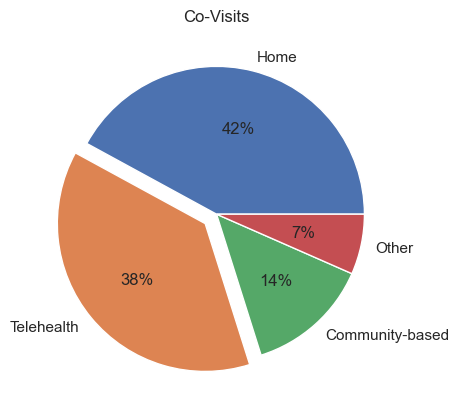

In [ ]:
values1 = a2['co-visits'].values
labels1 = a2['setting'].values
explode1 = (0, 0.1, 0, 0)
plt.pie(values1, labels=labels1, colors=colors1, explode=explode1, autopct='%1.0f%%')
plt.title('Co-Visits')
plt.show()


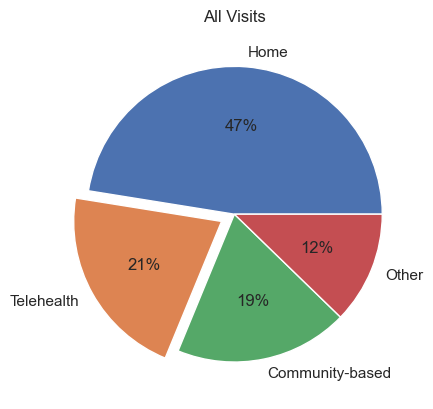

In [ ]:
values2 = a2['all_EIRA'].values
labels2 = a2['setting'].values
explode2 = (0, 0.1, 0, 0)
plt.pie(values2, labels=labels2, colors=colors1, explode=explode2, autopct='%1.0f%%')
plt.title('All Visits')
plt.show()

In [ ]:
agency_type

,index,Agency Type
0,EIRA,65.426964
1,Independent,34.573036


In [ ]:
whole_type

,index,Agency Type
0,EIRA,84.211078
1,Independent,15.778431
2,Other,0.010491


In [ ]:
b1

,index,Service Name
0,Dev. Therapy Prof - Home/Community,58.649376
1,Occupational Therapy,12.258380
2,Speech Therapy,10.398826
3,Physical Therapy,7.511622
4,Dev. Therapy - BCBA,3.254221
5,Dev. Therapy Center-Based,2.495718
6,Vision Services,1.468069
7,Eval/Assess - Developmental,1.272327
8,Physical Therapy Assistant,0.782970
9,Evaluation - Occupational Therapy,0.636163
